In [7]:
import numpy as np  
import pandas as pd 

from pandas import Series, DataFrame

In [1]:
s = 'abcd efgh'
s.upper()

'ABCD EFGH'

In [2]:
s.upper().split()

['ABCD', 'EFGH']

In [ ]:
# this doesnt always work in Python -- whenever we invoke a method on a mutable object 
# that then modifies the object, we get back None, and the object is changed. 

In [3]:
myList = [10, 20, 30]
myList.append(40)

In [4]:
myList

[10, 20, 30, 40]

In [5]:
myList.append(40).count(10)

AttributeError: 'NoneType' object has no attribute 'count'

In [6]:
myList

[10, 20, 30, 40, 40]

In [ ]:
# in Pandas, so long as we dont assign to a series/data frame, and so long as we  dont use inplace = True,
# we will basically always get back an object on which we can run a method. 

In [8]:
s = Series([10, 20, 30, 40, 50])

In [9]:
s.mean()

30.0

In [10]:
s = Series('this is a bunch of strings'.split())

In [11]:
s.str.len()

0    4
1    2
2    1
3    5
4    2
5    7
dtype: int64

In [ ]:
# find all of the string that have > 3 characters 

In [12]:
df = DataFrame({'words':s, 'len':s.str.len()})

In [13]:
df

,words,len
0,this,4
1,is,2
2,a,1
3,bunch,5
4,of,2
5,strings,7


In [14]:
# get the first upper-cased character of each string 
df['words'].str.get(0).str.upper()

0    T
1    I
2    A
3    B
4    O
5    S
Name: words, dtype: object

In [15]:
(
    df['words']
    .str.get(0)
    .str.upper()
)

0    T
1    I
2    A
3    B
4    O
5    S
Name: words, dtype: object

When I want to do several queries, without using the parentheses, i have to write everything inside one line, which is urgly to see and decode. Yet, if i seemly putting them inside parentheses, python will understand them as oneline of code yet allowing the visuability of the code. 

In [17]:
np.random.seed(0)
df = DataFrame(np.random.randint(-1000, 1000, [4,3]),
               index=list('abcd'),
               columns=list('xyz'))

df

,x,y,z
a,-316,-441,653
b,216,-165,-237
c,731,383,33
d,747,-723,778


In [18]:
# I only want column x and z 

df[['x', 'z']]

,x,z
a,-316,653
b,216,-237
c,731,33
d,747,778


In [ ]:
# the different of using [] version [[]] is 
# [] is saying, i want a column 
# [[]] is saying, i want a list of the following columns 
    # or, I want to put the following columns into a list 

In [ ]:
# using method chaning, we can also ask for specific columns 

In [19]:
(
    df[['x', 'y']]
)

,x,y
a,-316,-441
b,216,-165
c,731,383
d,747,-723


In [ ]:
# getting the information from row b and d 

In [20]:
df.loc[['b', 'd']]

,x,y,z
b,216,-165,-237
d,747,-723,778


In [21]:
(
    df[['x', 'y']]
    .loc[['b','d']]
)

,x,y
b,216,-165
d,747,-723


In [23]:
# get the mean of columns x and z and rows b and d  
(
    df[['x', 'z']]
    .loc[['b','d']]
    .mean()
)

x    481.5
z    270.5
dtype: float64

In [24]:
(
    df
    .loc[
        ['b', 'd'],
        ['x', 'z']
    ]
    .mean()
)

x    481.5
z    270.5
dtype: float64

In [ ]:
# using .loc[] to select rows and columns 
# as .loc[] can take two arguments = the row selector and the column selector

In [ ]:
# getting columns x and z, but only where the value of x is > 200 
# we always use boolean indexes in Pandas to retrieve selected rows. 
# if i have to use the condition loop, there is something wrong or probably im not using the right tool 

In [33]:
df['x'] > 0 

a    False
b     True
c     True
d     True
Name: x, dtype: bool

In [37]:
df.loc[
    df['x'] > 200
    ]

,x,y,z
b,216,-165,-237
c,731,383,33
d,747,-723,778


In [ ]:
# getting columns x and z, with all row where x > 200 

In [38]:
(
    df
    .loc[
        df['x'] > 200,
        ['x', 'z']
    ]
)

,x,z
b,216,-237
c,731,33
d,747,778


In [ ]:
# getting columns x and z, with all row where x > 200 and z < 200b

In [39]:
(
    df
    .loc[
        ((df['x'] > 200) & (df['z'] < 200)),
        ['x', 'z']
    ]
)

,x,z
b,216,-237
c,731,33


In [45]:
# then calculate the mean, and find the index where the mean is the greatest 

(
    df
    .loc[
        ((df['x'] > 200) & (df['z'] < 200)),
        ['x', 'z']
    ]
    .mean()
    .idxmax() # this returns the index of the max value
)

'x'

<Axes: >

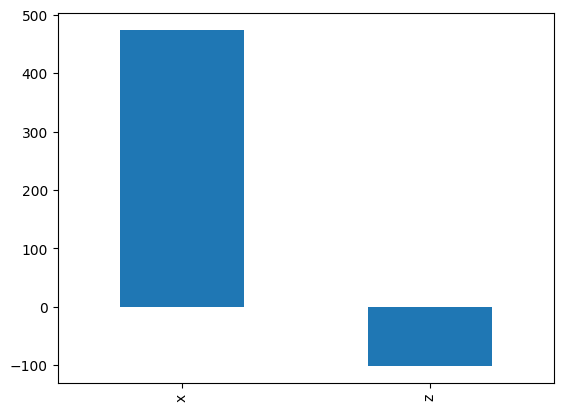

In [50]:
# then calculate the mean, and plot them in a bar chart 

(
    df
    .loc[
        ((df['x'] > 200) & (df['z'] < 200)),
        ['x', 'z']
    ]
    .mean()
    .plot.bar()
)

In [ ]:
# Exercise: 
